In [2]:
import numpy as np

In [4]:
!pip install Collection

  Preparing metadata (setup.py) ... done
  Created wheel for Collection: filename=collection-0.1.6-py3-none-any.whl size=5147 sha256=60f8ce032bee5e8f2942b48640ffa23415e2e62412d35c4427780af5cf6c4687
  Stored in directory: /Users/jellashivaramkumar/Library/Caches/pip/wheels/12/bb/2e/e430efbb8e7a845a40292527c78c51d201db424b763ae2ccdb
Successfully built Collection


In [ ]:
from Collection import Counter

In [30]:
import numpy as np
from collections import Counter

def euclid_dist(x1, x2):
    
    dist = np.sqrt(np.sum((x1 - x2) ** 2))
    return dist

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):  #----Helper Function----------|
        # Calculate distances to all training points
        distances = [euclid_dist(x, x_train) for x_train in self.X_train]
        
        # Get indices of k nearest neighbors 
        k_indices = np.argsort(distances)[:self.k]
        
        # Get labels of k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [16]:
from sklearn import datasets # Here I am taking iris dataset or any other dataset if you want to test out
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


iris = datasets.load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

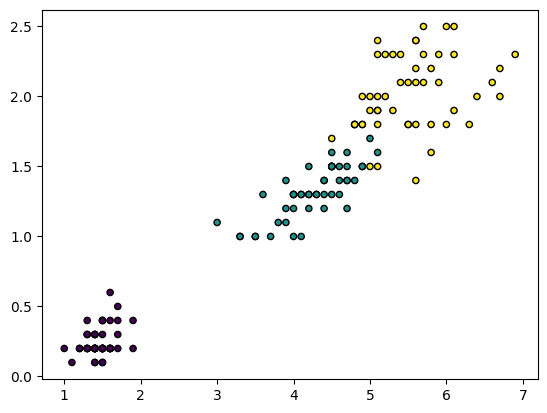

In [20]:
plt.figure()
plt.scatter(X[:,2],X[:,3],c=y,edgecolor='k',s=20)
plt.show()

In [32]:
clf = KNN(k=5)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print(predictions)


[1 2 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [56]:
import math
acc = np.sum(predictions==y_test)/len(y_test)
(acc*100)

np.float64(96.66666666666667)